<a href="https://colab.research.google.com/github/Seraph003/Skripsi/blob/main/SKRIPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os


drive.mount('/content/drive')
q_table_path = '/content/drive/MyDrive/q_learning/q_table.npy'
os.makedirs(os.path.dirname(q_table_path), exist_ok=True)

Mounted at /content/drive


Q-table dimuat dari: /content/drive/MyDrive/q_learning/q_table.npy
Q-table disimpan ke: /content/drive/MyDrive/q_learning/q_table.npy
Path 1: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (9, 19), (10, 19), (11, 19), (12, 19), (12, 18), (12, 17), (12, 16), (12, 15), (12, 14), (12, 13), (12, 12), (13, 12), (14, 12)]
Q-values for this path: [np.float64(-8.979062626327977), np.float64(-8.925329080345236), np.float64(-8.868767452994982), np.float64(-8.80922889788945), np.float64(-8.746556734620471), np.float64(-8.680586036442598), np.float64(-8.611143196255362), np.float64(-8.538045469742483), np.float64(-8.461100494465768), np.float64(-8.380105783648172), np.float64(-8.294848193313863), np.float64(-8.20510336138301), np.float64(-8.11063511724527), np.float64(-8.011194860258176), np.float64(-7.9065209055

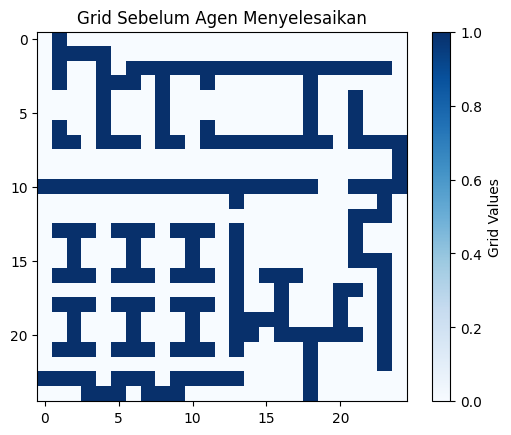

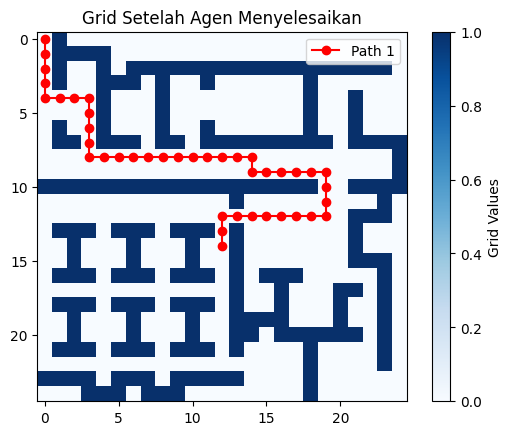

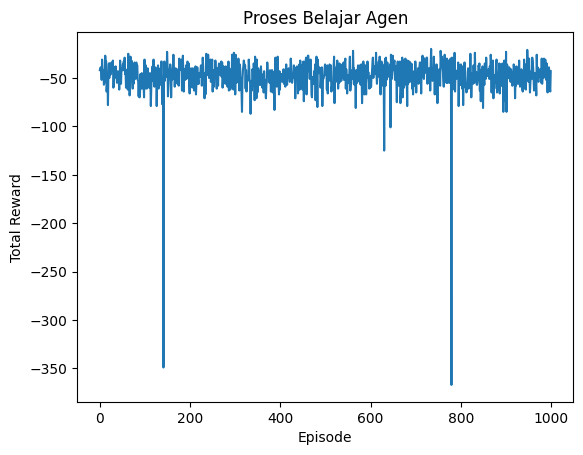

Percobaan pemilihan jalur:
Percobaan 1: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (9, 14), (9, 15), (9, 16), (8, 16), (8, 17), (8, 18), (9, 18), (9, 19), (9, 20), (10, 20), (11, 20), (12, 20), (13, 20), (14, 20), (15, 20), (16, 20), (16, 21), (16, 22), (17, 22), (18, 22), (19, 22), (20, 22), (21, 22), (22, 22), (23, 22), (23, 23), (23, 24), (22, 24), (21, 24), (20, 24), (19, 24), (18, 24), (17, 24), (16, 24), (15, 24), (14, 24), (13, 24), (12, 24), (11, 24)]
Percobaan 2: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (9, 19), (9, 20), (10, 20), (9, 20), (8, 20), (9, 20), (10, 20), (11, 20), (10, 20), (11, 20), (12, 20), (1

In [ ]:
# @title Pelatihan Agen
import numpy as np
import random
import time
import matplotlib.pyplot as plt

def create_readable_grid():
    grid =[

        ['S', 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'G2'],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 'G1', 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

     ]

    numeric_grid = np.zeros((len(grid), len(grid[0])))
    start = None
    goals = []

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 'S':
                start = (i, j)
                numeric_grid[i][j] = 0
            elif grid[i][j] == 'G1':
                goals.append((i, j, 'G1'))
                numeric_grid[i][j] = 0
            elif grid[i][j] == 'G2':
                goals.append((i, j, 'G2'))
                numeric_grid[i][j] = 0
            else:
                numeric_grid[i][j] = grid[i][j]

    return numeric_grid, start, goals

class QLearningAgent:
    def __init__(self, grid, alpha=0.2, gamma=0.95, epsilon=0.2, episodes=1000, max_steps=500):
        self.grid = grid
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.max_steps = max_steps  # Menambahkan max_steps
        self.q_table = np.zeros((*grid.shape, 4))
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up
        self.rewards = []
        self.paths = []

    def save_q_table(self, filename):
        np.save(filename, self.q_table)
        print(f"Q-table disimpan ke: {filename}")

    def load_q_table(self, filename):
        if os.path.exists(filename):
            self.q_table = np.load(filename)
            print(f"Q-table dimuat dari: {filename}")
        else:
            print("Q-table belum ditemukan. Memulai dengan tabel kosong.")

    def train(self, start, goals):
        goal_set = set([goal[:2] for goal in goals])
        for episode in range(self.episodes):
            state = start
            total_reward = 0
            path = [state]
            steps = 0
            while state not in goal_set and steps < self.max_steps:  # Batas langkah to max_steps
                steps += 1
                if random.uniform(0, 1) < self.epsilon:
                    action_idx = random.randint(0, 3)
                else:
                    action_idx = np.argmax(self.q_table[state])

                next_state = (state[0] + self.actions[action_idx][0], state[1] + self.actions[action_idx][1])

                if (0 <= next_state[0] < self.grid.shape[0] and
                    0 <= next_state[1] < self.grid.shape[1] and
                    self.grid[next_state] == 0):
                    reward = 10 if next_state in goal_set else -0.5
                    self.q_table[state][action_idx] += self.alpha * (
                        reward + self.gamma * np.max(self.q_table[next_state]) - self.q_table[state][action_idx])
                    state = next_state
                    total_reward += reward
                    path.append(state)
                else:
                    self.q_table[state][action_idx] -= 5
                    total_reward -= 5
            self.rewards.append(total_reward)
            self.paths.append(path)


    def get_all_min_paths(self, start, goals):
        from collections import deque

        all_min_paths = []
        min_distance = None

        for goal in goals:
            goal_pos = goal[:2]  # mengambil lokasi (ignore the goal label 'G1'/'G2')
            queue = deque([(start, [start])])
            visited = set()

            while queue:
                current, path = queue.popleft()

                # Jika mencapai goal_pos, simpan jalur dan lanjutkan pencarian
                if current == goal_pos:
                    if min_distance is None or len(path) < min_distance:
                        min_distance = len(path)
                        all_min_paths = [path]
                    elif len(path) == min_distance:
                        all_min_paths.append(path)
                    break  # Keluar dari loop setelah mencapai goal, tidak perlu lanjut

                # Jika sudah mengunjungi state ini, lewati
                if current in visited:
                    continue

                visited.add(current)  # Tambahkan ke visited agar tidak diperiksa lagi

                # Tentukan aksi terbaik berdasarkan Q-value
                best_actions = np.argsort(-self.q_table[current].flatten())
                for action_idx in best_actions:
                    action = self.actions[action_idx]
                    next_state = (current[0] + action[0], current[1] + action[1])

                    # Periksa apakah next_state valid
                    if (0 <= next_state[0] < self.grid.shape[0] and
                        0 <= next_state[1] < self.grid.shape[1] and
                        self.grid[next_state] == 0 and
                        next_state not in visited):  # Periksa di visited bukan path
                        queue.append((next_state, path + [next_state]))

        # Menampilkan Q-value untuk setiap langkah di setiap jalur yang ditemukan
        for idx, path in enumerate(all_min_paths):
            print(f"Path {idx + 1}: {path}")
            q_values = []
            for state in path:
                best_action_idx = np.argmax(self.q_table[state])  # Ambil aksi terbaik berdasarkan Q-value
                q_value = self.q_table[state][best_action_idx]  # Q-value dari aksi terbaik
                q_values.append(q_value)
            print(f"Q-values for this path: {q_values}")

        return all_min_paths



    def plot_grid(self, paths=None, title="Grid"):
        grid_copy = self.grid.copy()
        plt.imshow(grid_copy, cmap='Blues', origin='upper')
        plt.colorbar(label='Grid Values')
        plt.title(title)

        if paths:
            colors = ['red', 'green', 'orange', 'purple', 'yellow']
            for idx, path in enumerate(paths):
                color = colors[idx % len(colors)]
                xs, ys = zip(*path)
                plt.plot(ys, xs, marker='o', color=color, label=f'Path {idx+1}')

            plt.legend()

        plt.show()

    def plot_learning_curve(self):
        plt.plot(self.rewards)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Proses Belajar Agen')
        plt.show()

    def plot_path_trials(self):
        print("Percobaan pemilihan jalur:")
        for i, path in enumerate(self.paths[-10:]):
            print(f"Percobaan {i+1}: {path}")

# Inisialisasi grid dan agen
grid, start, goals = create_readable_grid()
agent = QLearningAgent(grid, max_steps=500)

# Coba load Q-table jika sudah ada
agent.load_q_table(q_table_path)

# Latih agen (akan melanjutkan jika Q-table sudah ada)
start_time = time.time()
agent.train(start, goals)
end_time = time.time()

# Simpan Q-table setelah pelatihan
agent.save_q_table(q_table_path)


# Mendapatkan semua jalur optimal ke goal terdekat
closest_paths = agent.get_all_min_paths(start, goals)

# Cetak semua jalur
if closest_paths:
    for idx, path in enumerate(closest_paths):
        print(f"Jalur {idx + 1} ditemukan ke goal {path[-1]} dengan panjang {len(path)} -> {path}")
else:
    print("Tidak ada jalur yang ditemukan ke goal manapun.")

print("Waktu pelatihan:", round(end_time - start_time, 2), "detik")

# Visualisasi sebelum dan sesudah
agent.plot_grid(title="Grid Sebelum Agen Menyelesaikan")
agent.plot_grid(paths=closest_paths, title="Grid Setelah Agen Menyelesaikan")

# Visualisasi proses belajar dan percobaan jalur
agent.plot_learning_curve()
agent.plot_path_trials()


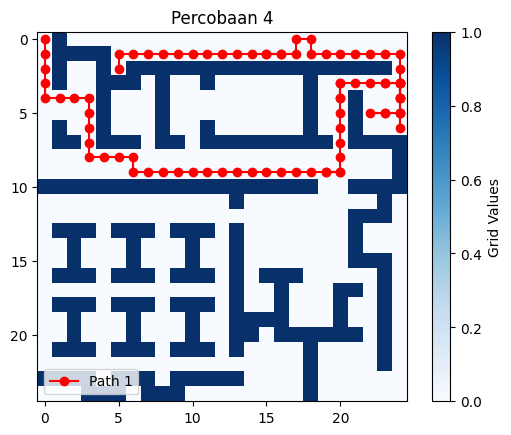

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(grid, paths=None, title="Grid"):
    grid_copy = np.array(grid)
    plt.imshow(grid_copy, cmap='Blues', origin='upper')
    plt.colorbar(label='Grid Values')
    plt.title(title)

    if paths:
        colors = ['red', 'green', 'orange', 'purple', 'yellow']
        for idx, path in enumerate(paths):
            color = colors[idx % len(colors)]
            xs, ys = zip(*path)
            plt.plot(ys, xs, marker='o', color=color, label=f'Path {idx+1}')

        plt.legend()

    plt.show()

grid = [

    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
]

# Jalur
path1 = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (8, 4), (8, 5), (8, 6), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (9, 19), (9, 20), (9, 19), (9, 20), (8, 20), (7, 20), (6, 20), (5, 20), (4, 20), (3, 20), (4, 20), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (4, 24), (3, 24), (4, 24), (5, 24), (6, 24), (5, 24), (5, 23), (5, 22), (5, 23), (5, 24), (4, 24), (3, 24), (3, 23), (3, 24), (2, 24), (1, 24), (1, 23), (1, 22), (1, 21), (1, 20), (1, 19), (1, 18), (0, 18), (0, 17), (1, 17), (1, 16), (1, 15), (1, 16), (1, 15), (1, 14), (1, 13), (1, 12), (1, 11), (1, 10), (1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (2, 5)]

# Panggil fungsi untuk plotting
plot_grid(grid, paths=[path1], title="Percobaan 4")

In [ ]:
import numpy as np

q_table_path = '/content/drive/MyDrive/q_learning/q_table.npy'
q_table = np.load(q_table_path)


print(q_table)
#print(q_table.shape)
#np.set_printoptions(threshold=np.inf)
#print(q_table)
#print(q_table[0][1])

[[[-1.85500000e+03 -8.97906263e+00 -1.73500000e+03 -2.08500000e+03]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-1.00000000e-01 -5.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 8.44932527e-01  7.47200000e-01 -1.00000000e-01 -1.00000000e+01]
  [-2.02610000e-01  6.76137581e+00 -2.44000000e-01 -1.00000000e+01]
  [-4.14323901e-01  6.49352325e+00 -7.63282375e-02 -5.00000000e+00]
  [-7.45445537e-01 -6.50485487e-01  3.02437876e+00 -1.50000000e+01]
  [-5.70219125e-01  2.77913727e+00 -9.57073479e-01 -1.50000000e+01]
  [-1.15555671e+00  3.73998387e+00 -1.06971709e+00 -5.00000000e+00]
  [-1.12518048e+00  2.78222499e+00 -1.28505488e+00 -3.00000000e+01]
  [-1.60368830e+00  3.14139960e+00 -1.91158148e+00 -5.50000000e+01]
  [-2.38699492e+00 -2.20597314e+00  1.47250113e+00 -3.50000000e+01]
  [-2.56997467e+00 -2.49172866e+00 -1.03790719e+